In [2]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import os 
import math
import sys
from pathlib import Path
import seaborn as sns

# Add 'src' to the system path
sys.path.append(str(Path().resolve() / 'src'))
from src.data.process_data import *
from src.data.clean_data import *
from src.utils.data_utils import *
from src.utils.plot_utils import *

IMPORTANT: these scripts/functions assume you have the following files in the data/raw directory:
- From the CMU dataset: 
    - movie.metadata.tsv
    - plot_summaries.txt
- From the TMDB dataset: 
    - TMDB_movie_dataset_v11.csv

AND have data/processed folder created

Note: download CMU dataset here: https://www.cs.cmu.edu/~ark/personas/data/MovieSummaries.tar.gz
and TMDB dataset here (Download button): https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies

In [123]:
# from raw files, creates clean datafiles
%run src/data/clean_data.py

sep ,
headers []
original df shape (1127777, 24)
after status (1102507, 24)
after release date (760743, 24)
after release year (760743, 25)
after duplicates (746388, 25)
after numeric columns (746387, 25)
after string to list (746387, 25)
after select columns (746387, 13)
sep 	
headers ['wikipedia_movie_id', 'freebase_ID', 'title', 'release_year', 'revenue', 'runtime', 'languages', 'countries', 'genres']
original df shape (81740, 9)
after status (81740, 9)
after release date (81740, 9)
after release year (44006, 9)
after duplicates (43915, 9)
after numeric columns (43915, 9)
after string to list (43915, 9)
after select columns (43915, 5)


In [3]:
# from clean data files, creates a dataframe with CMU + plots & TMDB movies 
df_combined = create_cmu_tmdb_dataset('data/processed/movies.csv','data/processed/plot_summaries.csv', 'data/processed/TMDB_clean.csv', 'inner')
df_tmdb = create_tmdb_dataset('data/processed/TMDB_clean.csv')

c:\Users\nicol\OneDrive - CentraleSupelec\Bureau\Cours EPFL\ADA\Project\ada-2024-project-databand\src\data\process_data.py:134: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_tmdb['overview'].fillna('', inplace=True)


In [125]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 430770 entries, 0 to 746386
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   release_year          430770 non-null  int64 
 1   summary               364351 non-null  object
 2   release_date          430770 non-null  object
 3   budget                430770 non-null  int64 
 4   original_language     430770 non-null  object
 5   overview              364351 non-null  object
 6   genres                430770 non-null  object
 7   production_companies  430770 non-null  object
 8   production_countries  430770 non-null  object
 9   spoken_languages      430770 non-null  object
 10  keywords              430770 non-null  object
 11  title                 430767 non-null  object
 12  revenue               430770 non-null  int64 
 13  runtime               430770 non-null  int64 
 14  dvd_era               430770 non-null  object
dtypes: int64(4), object(11

In [126]:
df_combined.head()

,release_year,summary,release_date,budget,original_language,overview,genres,production_companies,production_countries,spoken_languages,keywords,title,revenue,runtime,dvd_era
0,1987,"A series of murders of rich young women throughout Arizona bear distinctive signatures of a serial killer. Clues lead Detective Charles Mendoza to visit Paul White, a sound expert installing hi-fi systems in wealthy people's homes. His special talent is to make a noise which echoes through the air cavities in his head and shows him where the sound of the speakers should come from and echo in the room. He is married to Joan, whom, ten years earlier, he had seduced away from Mike DeSantos, her then current boyfriend. Joan is questioned by Mendoza, but does not believe his insinuations that her husband is somehow involved in the murders. Various flashbacks show Joan's previous relationship to Mike and later explain how it came to be that he abandoned her. The couple met Paul and befriended him. At Mike's suggestion, he and Mike go on a deer hunting trip together. Paul shoots a deer and brutally mutilates it, demonstrating his sick fascination with killing. This is partly intended to scare Mike off, which it does. Mike catches Joan and Paul after they've made love, and Paul declares that he will take Mike's place. ""I am the one,"" Paul says. Mike puts his gun at the back of Paul's head but decides not to kill and abandons Joan. By now Joan has run into Mike DeSantos working at a gas station in a neighboring town. Mike tells her he got out of prison after suffering a major head injury; he thinks life is looking up. He makes her promise not to tell Paul that she has seen him. Joan soon discovers Paul has committed adultery. By puncturing Paul's tires she provides him with an alibi for the most recent killing. He begs her forgiveness as the police turn their suspicions away from him. At home, Joan looks into a crawl space in the house, and discovers preserved body parts of Paul's victims wrapped in paper and plastic. Joan confronts Paul, and Paul tries to explain his motivations for killing. He believes he has been ""chosen"" and is expressing the nothingness of the universe, whose heart is female and destructive like a black hole. He is putting women ""out of their misery,"" but he loves Joan. Joan's distrust of Mike over the next night and day agitates him into a fury. First, he tries to imprison her and then kill her and his daughter. He heavily arms himself and paints his face to look like a samurai warrior or an Indian brave. Joan and the little girl escape in different directions and soon Joan has to elude Paul in the abandoned quarry. It turns out Mike has been staying there, armed with a machine gun, certain that he will meet Paul again. He rescues Joan and takes away Paul's gun, leading him to the edge of the quarry. Paul makes the sound he uses in the emptiness of living rooms and savors its echo from the quarry. While incessantly pontificating about his philosophies of life and death, Paul reveals a lighter with which he has lit the fuse of his explosive vest. Mike opens fire on him with a machine gun and Joan dives into the lake in the quarry. Paul and Mike both die instantly, in a hail of destruction. Joan is reunited later with her daughter. She talks with Detective Mendoza about what the ten years with Paul could have meant, whose destructive and nihilistic nature she never understood. Based on the 1983 novel Mrs White by Margaret Tracy .",1987-06-19,0,en,"In a wealthy and isolated desert community, a sound expert is targeted as the prime suspect of a series of brutal murders of local suburban housewives who were attacked and mutilated in their homes. As he desperately tries to prove his innocence, his wife starts to uncover startling truths...","['Horror', 'Thriller']","[""Mrs. White's Productions""]",['United Kingdom'],['English'],"['based on novel or book', 'gas station', 'psychopath', 'insanity', 'detective', 'arizona', 'slasher', 'ser

## Main budget plots - TMDB

### Budget trends
See `data_overview_NM` for non inflation-adjusted plot and for the plots of a discrete derivative of budget.

c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


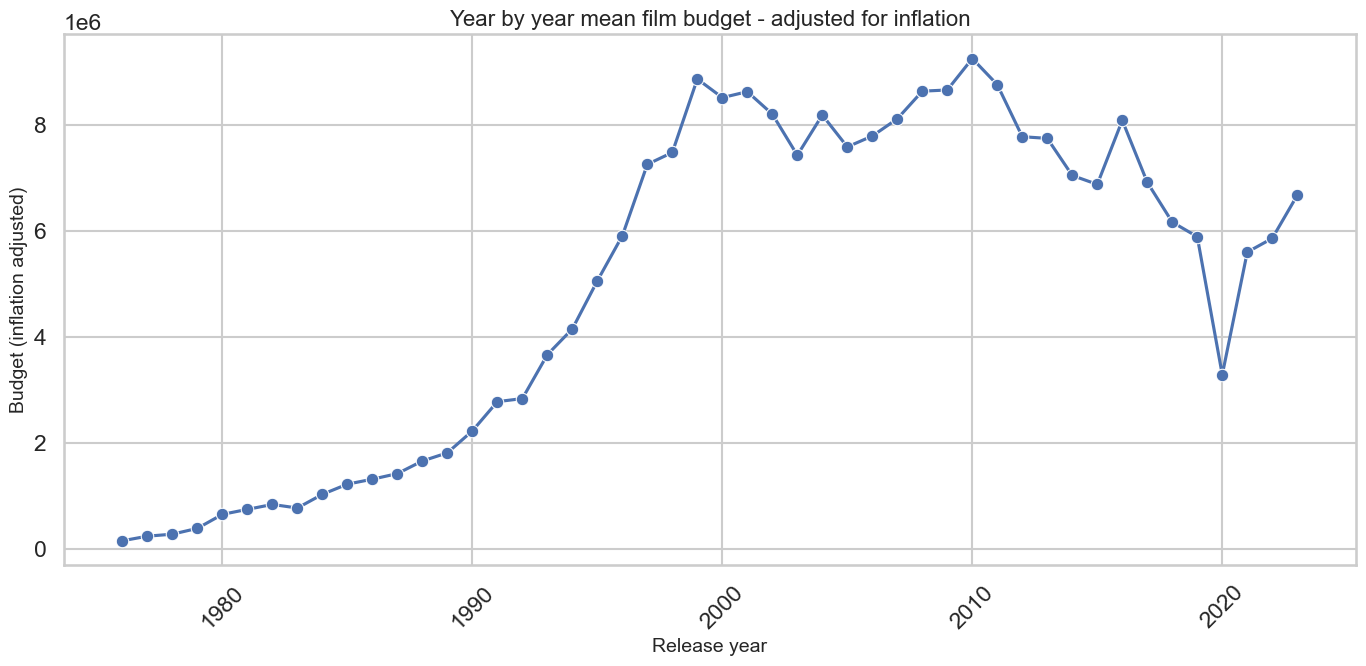

In [4]:
budget_stats = df_tmdb.groupby('release_year')['budget'].agg(mean_budget='mean').reset_index()

# Adjust the inflation for the budget statistics
budget_stats_inflation = adjust_inflation(budget_stats, old_col='mean_budget', new_col='mean_budget_inflation')

# Set the style and context for the plot
sns.set(style="whitegrid", context="talk")

# Plot the statistics
plt.figure(figsize=(14, 7))
sns.lineplot(data=budget_stats_inflation, x='release_year', y='mean_budget_inflation', marker='o')

# Customize the plot
plt.title('Year by year mean film budget - adjusted for inflation', fontsize=16)
plt.xlabel('Release year', fontsize=14)
plt.ylabel('Budget (inflation adjusted)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### Budget histograms

c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

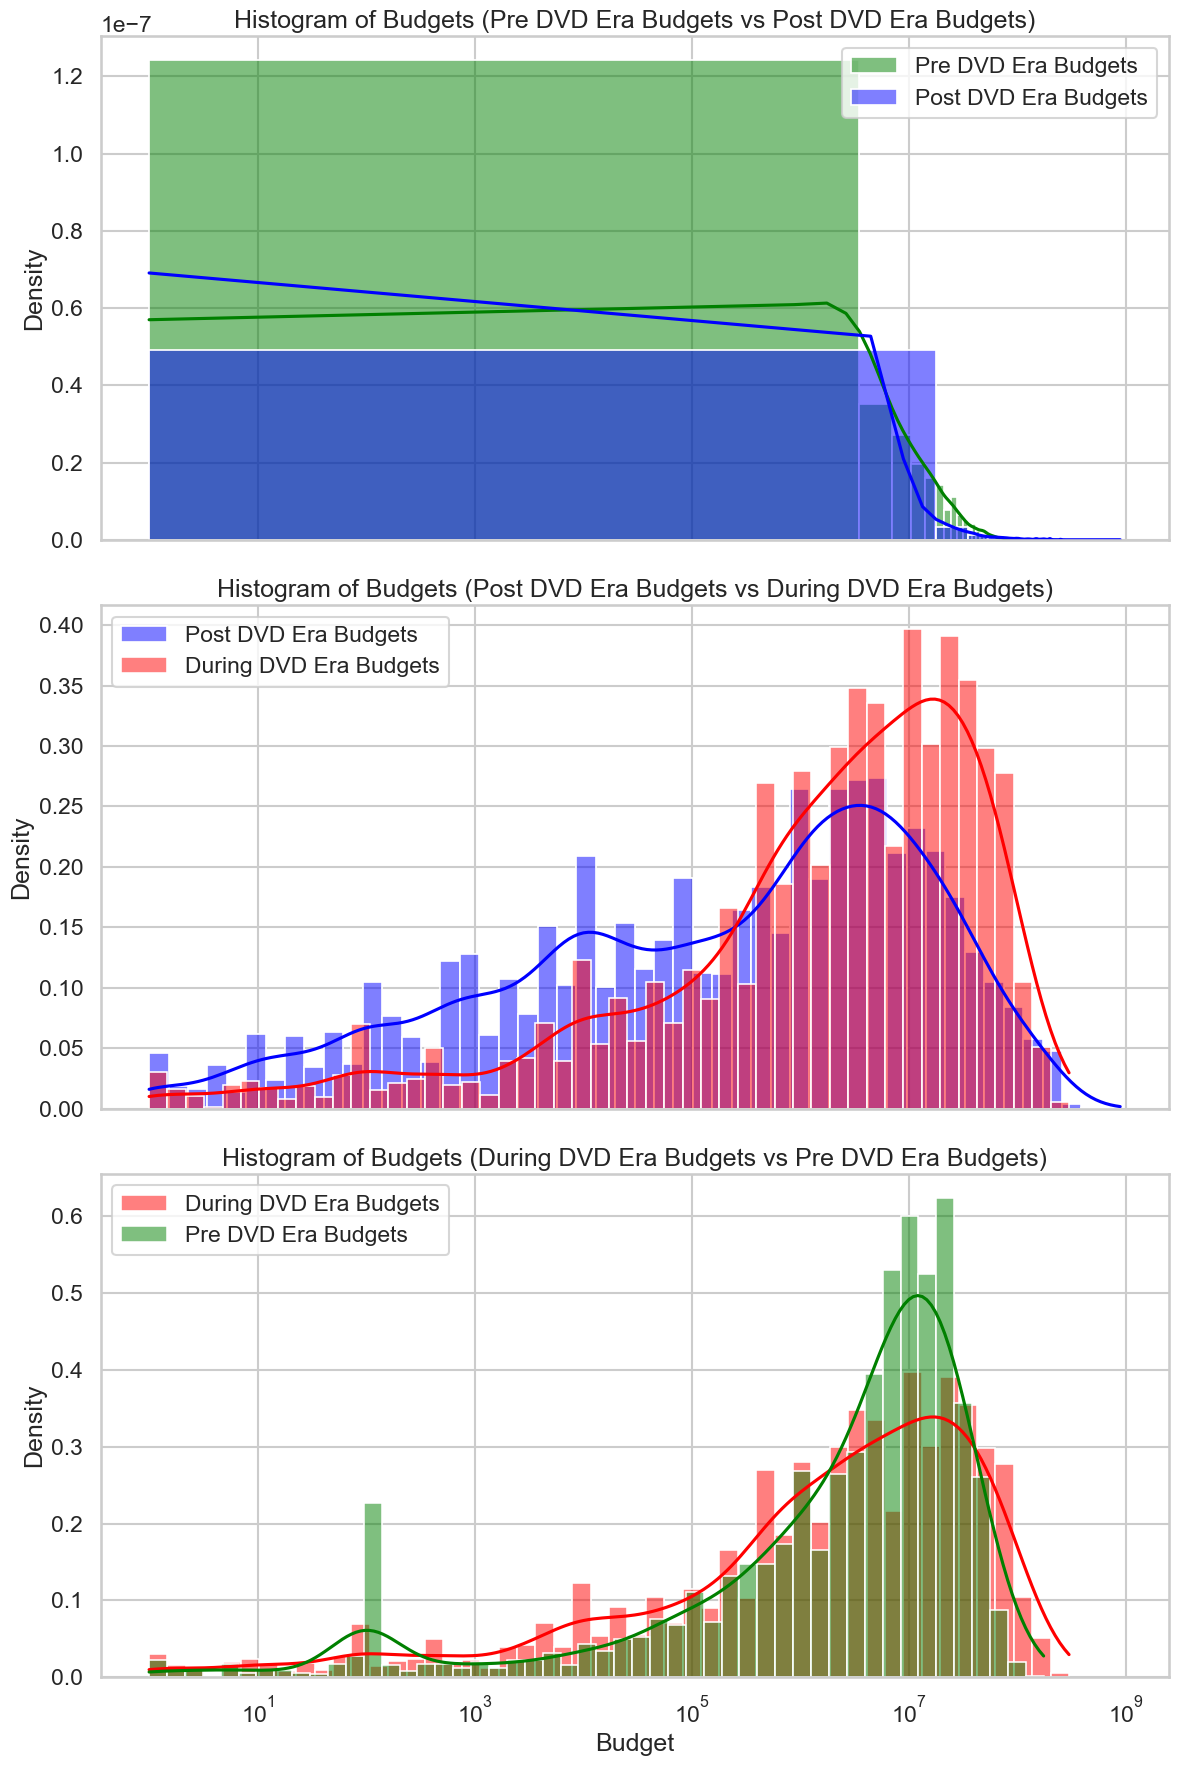

In [5]:
df_filtered = df_tmdb[(df_tmdb['budget'] > 0)]

def plot_histograms(df, eras, colors, labels, title):
    fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

    for i, (era1, era2) in enumerate(eras):
        ax = axes[i]
        sns.histplot(df[df['dvd_era'] == era1]['budget'], bins=50, color=colors[i][0], label=labels[i][0], ax=ax, kde=True, stat="density")
        sns.histplot(df[df['dvd_era'] == era2]['budget'], bins=50, color=colors[i][1], label=labels[i][1], ax=ax, kde=True, stat="density")
        ax.set_xscale('log')
        ax.set_xlabel('Budget')
        ax.set_ylabel('Density')
        ax.legend()
        ax.set_title(f'{title} ({labels[i][0]} vs {labels[i][1]})')

    plt.tight_layout()
    plt.show()

# Define eras, colors, and labels for the plots
eras = [("pre", "post"), ("post", "during"), ("during", "pre")]
colors = [('green', 'blue'), ('blue', 'red'), ('red', 'green')]
labels = [('Pre DVD Era Budgets', 'Post DVD Era Budgets'), 
          ('Post DVD Era Budgets', 'During DVD Era Budgets'), 
          ('During DVD Era Budgets', 'Pre DVD Era Budgets')]

# Plot histograms
plot_histograms(df_filtered, eras, colors, labels, 'Histogram of Budgets')

### Production types

c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

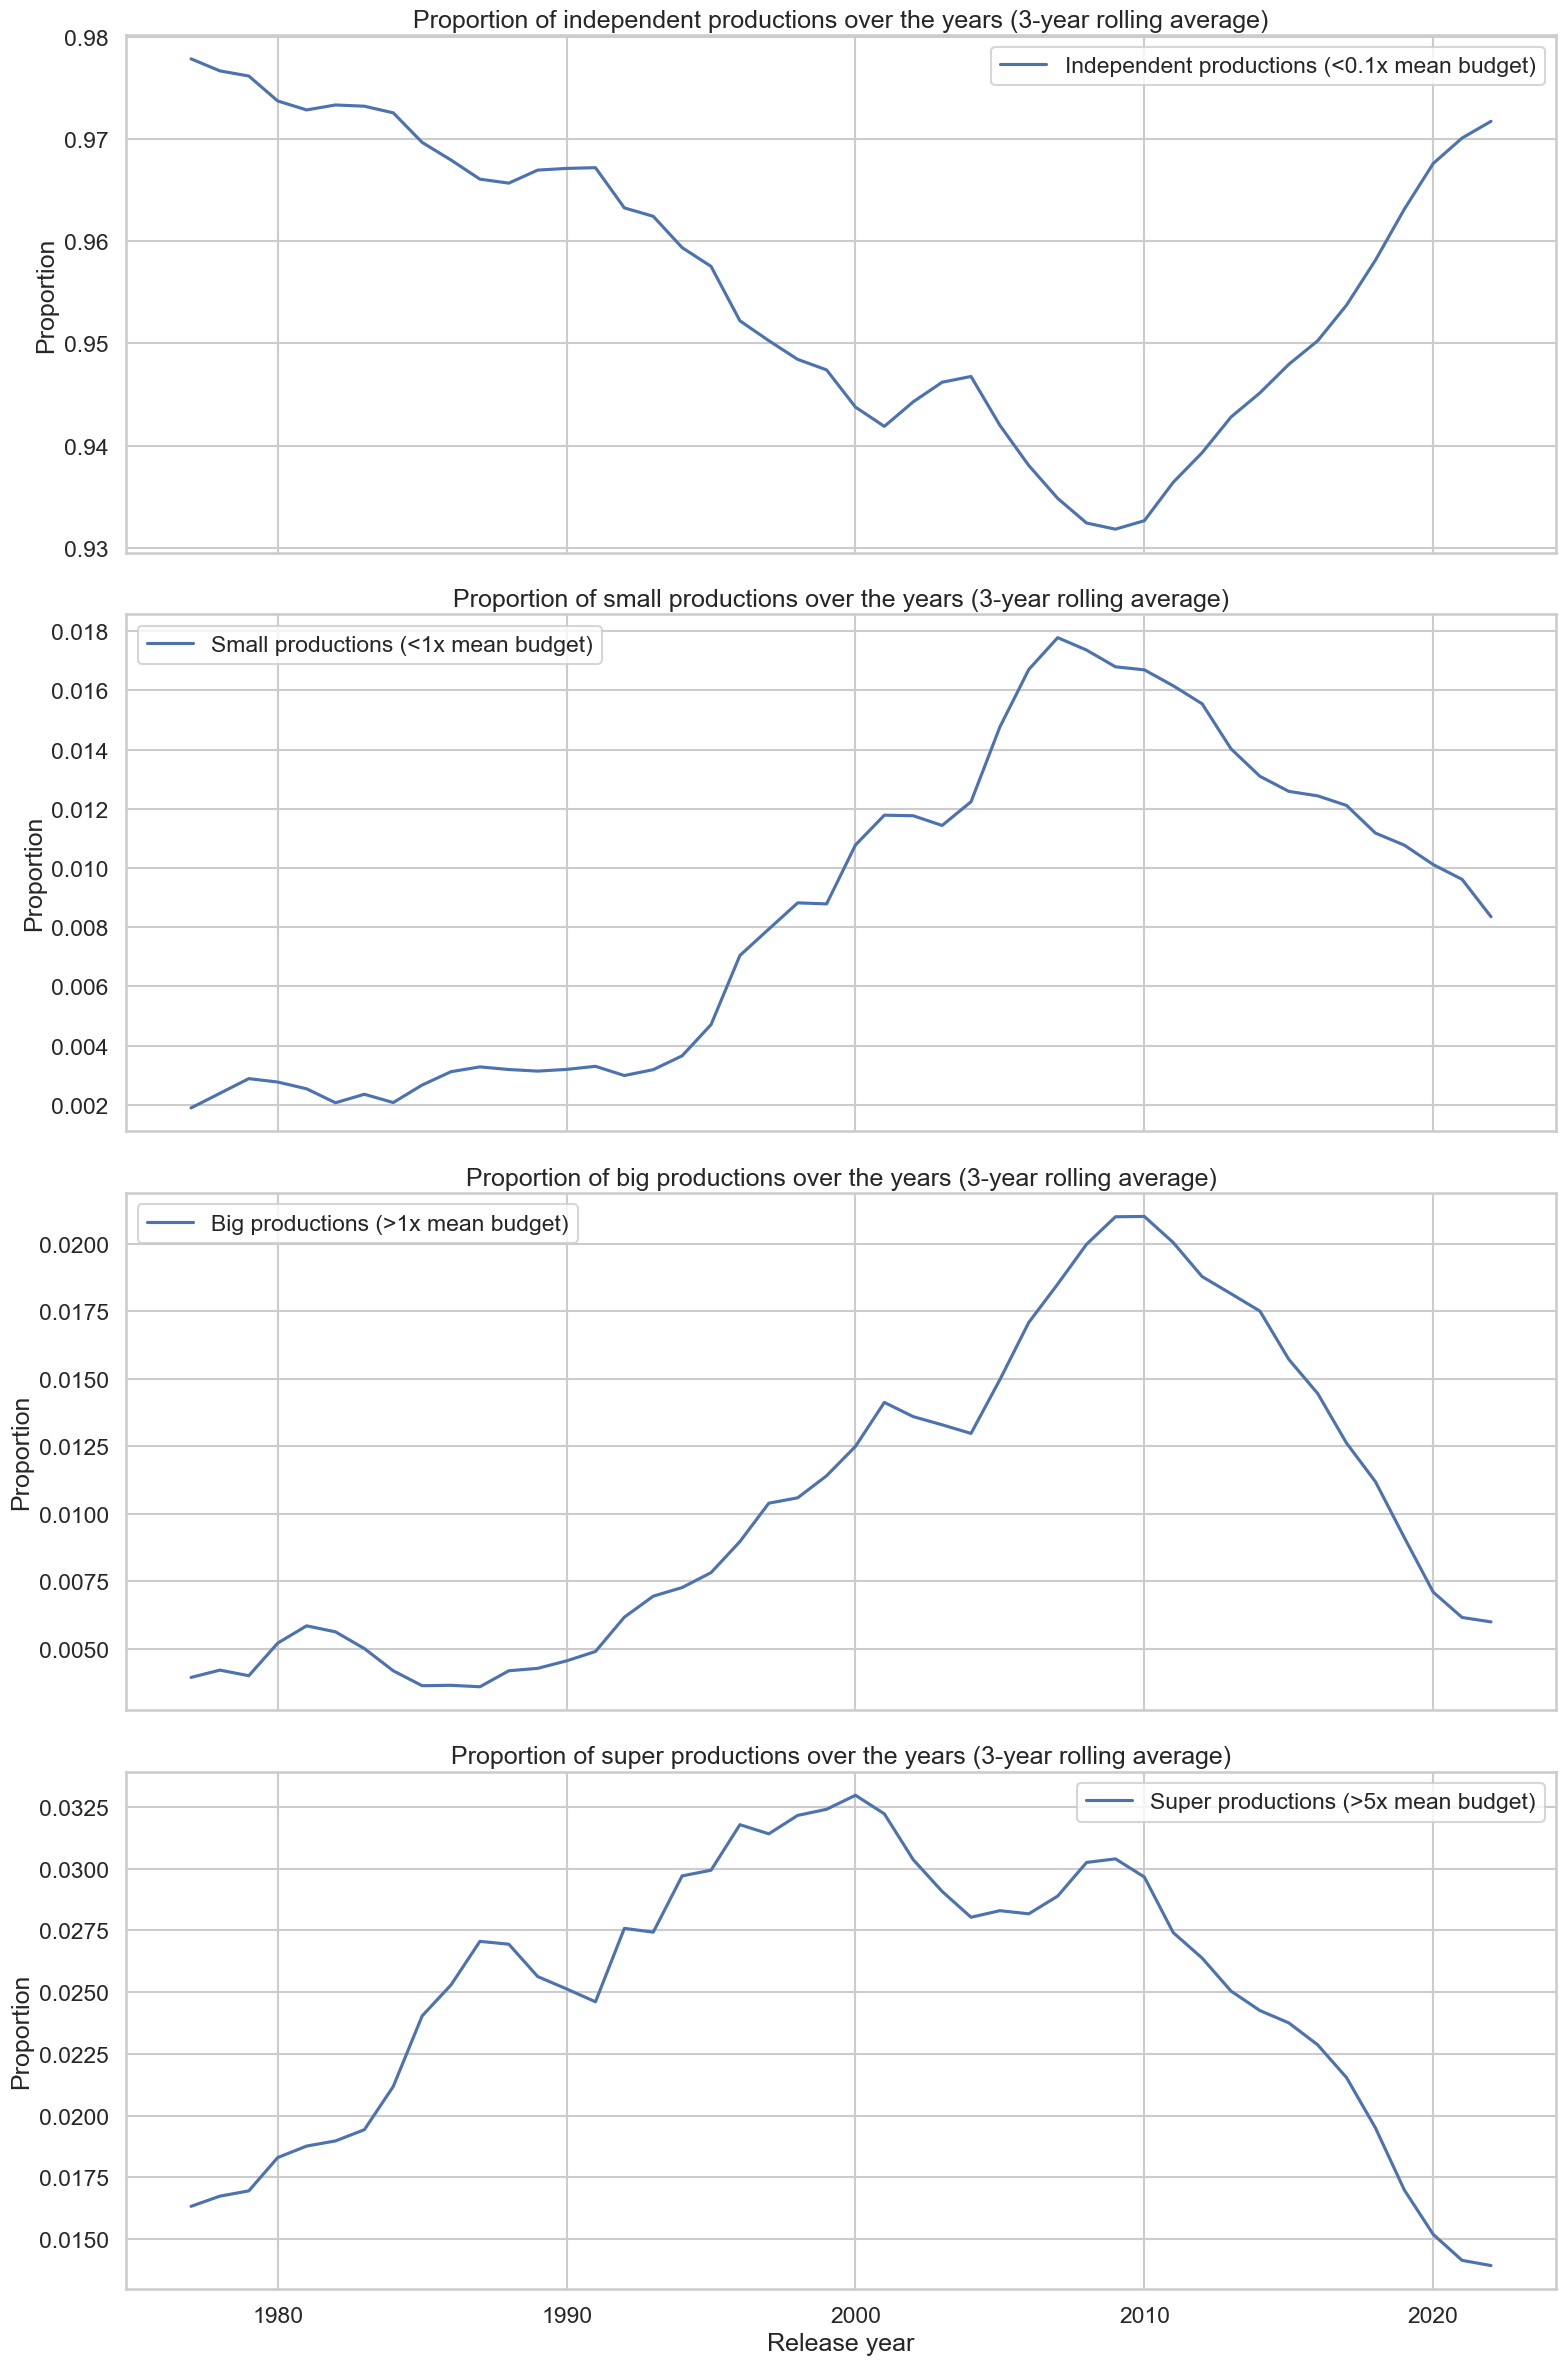

In [6]:
# Define budget categories
def categorize_budget(row):
    mean_budget_row = budget_stats.loc[budget_stats['release_year'] == row['release_year'], 'mean_budget']
    if mean_budget_row.empty:
        return 'Unknown'
    mean_budget = mean_budget_row.values[0]
    if row['budget'] < 0.1 * mean_budget:
        return 'Independent'
    elif row['budget'] < mean_budget:
        return 'Small'
    elif row['budget'] < 5 * mean_budget:
        return 'Big'
    else:
        return 'Super'

df_tmdb['budget_category'] = df_tmdb.apply(categorize_budget, axis=1)

# Count the number of each budget category per year
budget_category_counts = df_tmdb.groupby(['release_year', 'budget_category']).size().unstack(fill_value=0)

# Calculate the proportion of each budget category per year
budget_category_proportions = budget_category_counts.div(budget_category_counts.sum(axis=1), axis=0)

# Calculate the 3-year rolling average for each budget category
proportion_rolling = budget_category_proportions.rolling(window=3, center=True).mean()

# Set the style and context for the plot
sns.set(style="whitegrid", context="talk")

# Create a 4x1 grid of plots
fig, axes = plt.subplots(4, 1, figsize=(16, 24), sharex=True)

# Plot the proportion of independent productions over the years
sns.lineplot(data=proportion_rolling['Independent'], ax=axes[0], label='Independent productions (<0.1x mean budget)')
axes[0].set_title('Proportion of independent productions over the years (3-year rolling average)')
axes[0].set_xlabel('Release year')
axes[0].set_ylabel('Proportion')
axes[0].legend()

# Plot the proportion of small productions over the years
sns.lineplot(data=proportion_rolling['Small'], ax=axes[1], label='Small productions (<1x mean budget)')
axes[1].set_title('Proportion of small productions over the years (3-year rolling average)')
axes[1].set_xlabel('Release year')
axes[1].set_ylabel('Proportion')
axes[1].legend()

# Plot the proportion of big productions over the years
sns.lineplot(data=proportion_rolling['Big'], ax=axes[2], label='Big productions (>1x mean budget)')
axes[2].set_title('Proportion of big productions over the years (3-year rolling average)')
axes[2].set_xlabel('Release year')
axes[2].set_ylabel('Proportion')
axes[2].legend()

# Plot the proportion of super productions over the years
sns.lineplot(data=proportion_rolling['Super'], ax=axes[3], label='Super productions (>5x mean budget)')
axes[3].set_title('Proportion of super productions over the years (3-year rolling average)')
axes[3].set_xlabel('Release year')
axes[3].set_ylabel('Proportion')
axes[3].legend()

plt.tight_layout()
plt.show()